<a href="https://colab.research.google.com/github/Kondasagar/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description:
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. 

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


# Data Description:

## Demographic:

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


## Behavioral:

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)


# Medical( history):

• **BP Meds**: whether or not the patient was on blood pressure medication(Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)
Predict variable (desired target)

## 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -dependent variable

# Mounting google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Importing important libraries

In [2]:
# importing pandas for data reading and manipulations
# numpy for linear algebra
# seaborn and matplotlib for visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone Projects/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [22]:
# first ten rows
df.head(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,41,2.0,F,YES,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,78.0,0


In [23]:
# last ten rows
df.tail(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3380,56,1.0,F,YES,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,57,3.0,F,NO,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# data types and null values in features ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

* In this dataset we have 3390 rows, 17 columns.


In [7]:
# summary of numerical features
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# duplicates any ?
len(df[df.duplicated()])

0

* **Observation**: NO duplicate rows in our data.

In [9]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# dropping the feature named 'id' which is not necessary for our study
df.drop('id',axis=1,inplace=True)

# Missing values in different features:

In [11]:
# missing values in each feature
df.isnull().sum().sort_values(ascending=False)


glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

* NUll values are present in features named 'glucose', 'education', 'BPMeds',   'totChol', 'cigsPerDay', 'BMI', 'heartRate'.

# Exploratory Data Analysis:

In [12]:
# numeric features in our data set
# Lets check the discrete and continuous features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


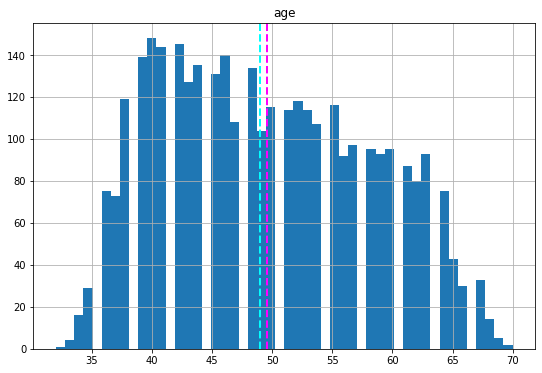

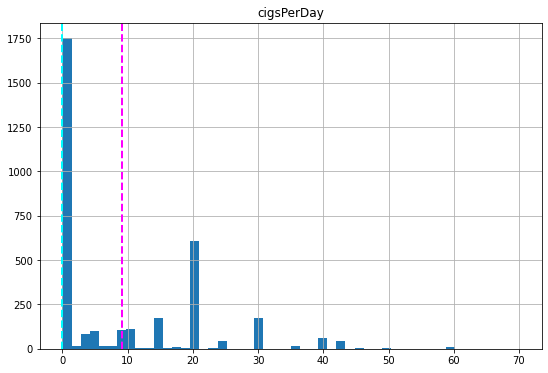

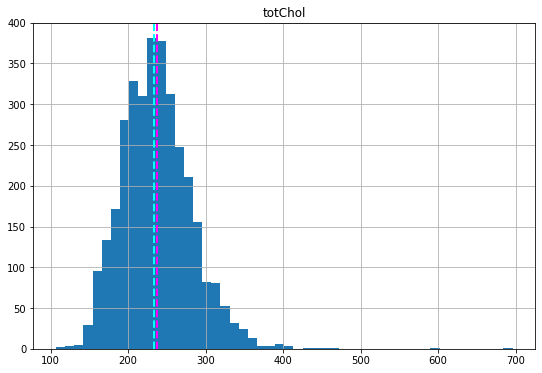

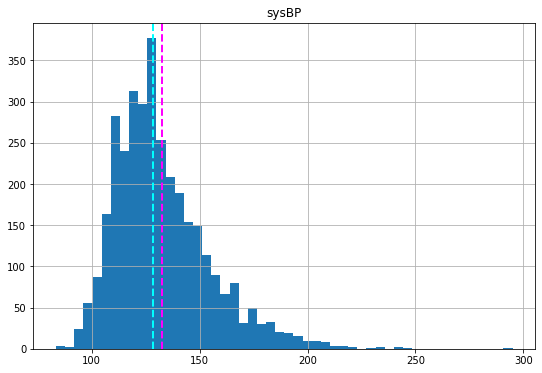

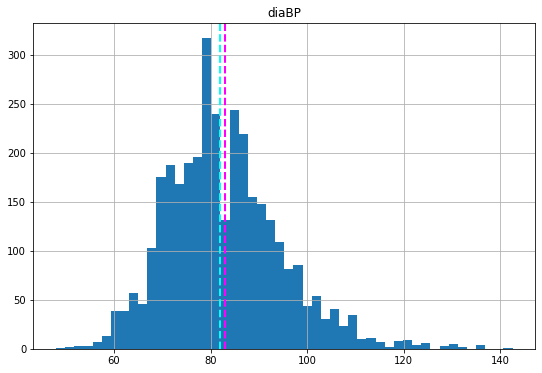

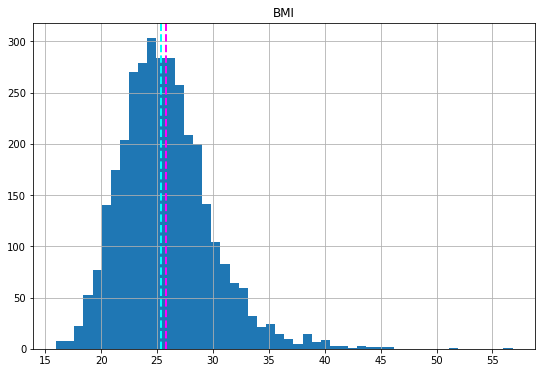

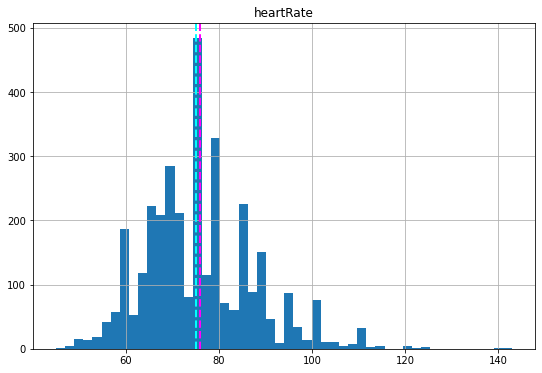

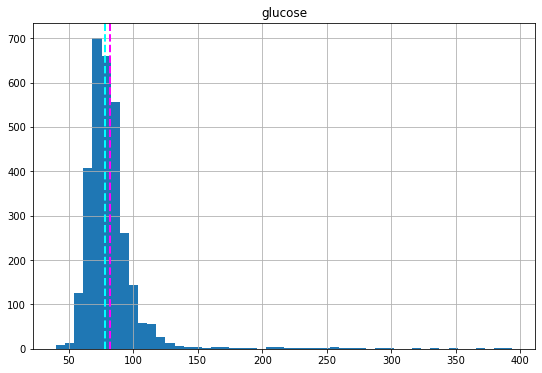

In [13]:
# plot a bar plot for each numerical feature

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)     
    ax.set_title(col)
plt.show()

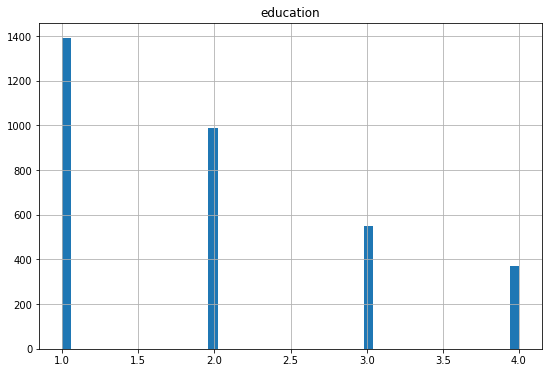

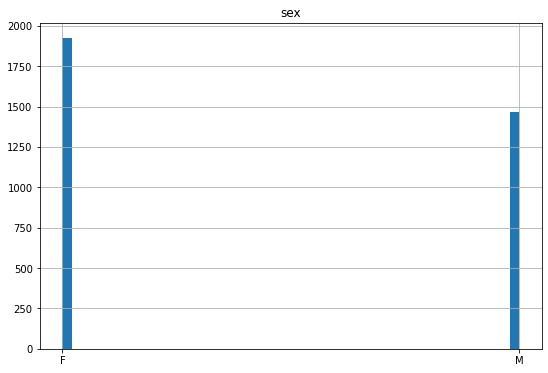

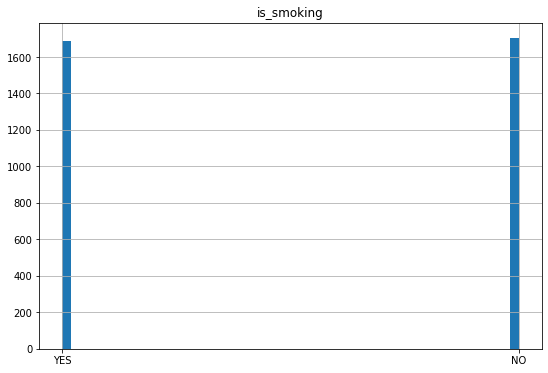

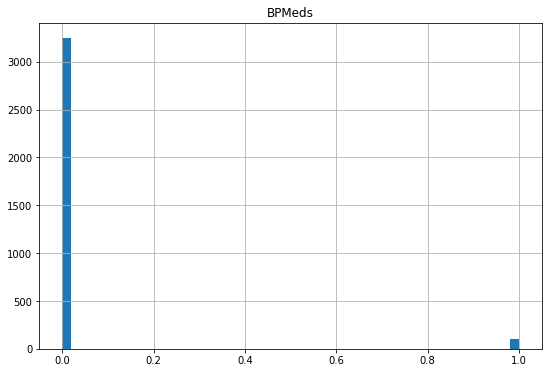

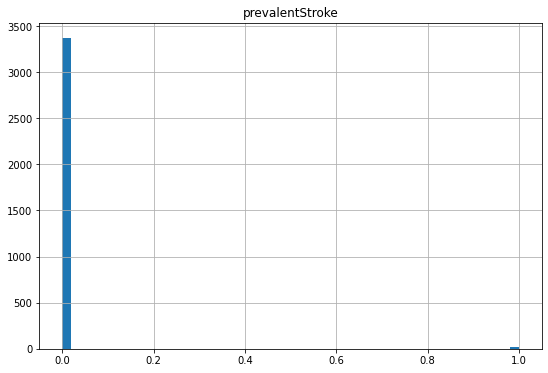

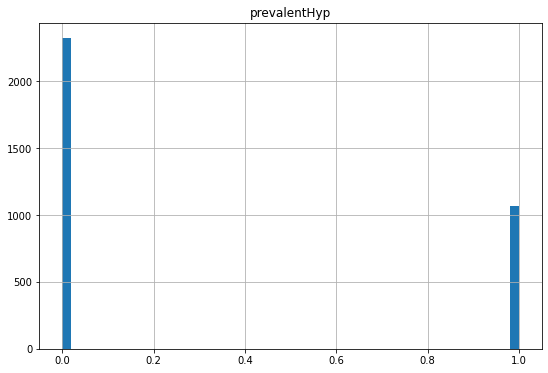

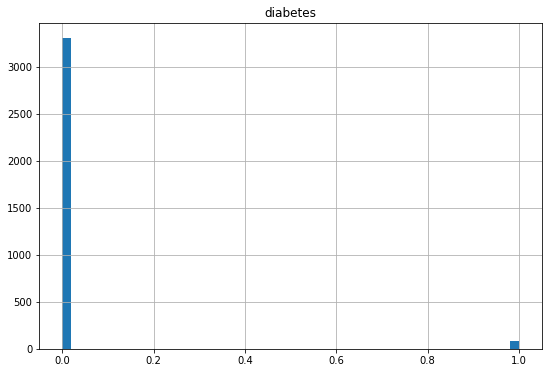

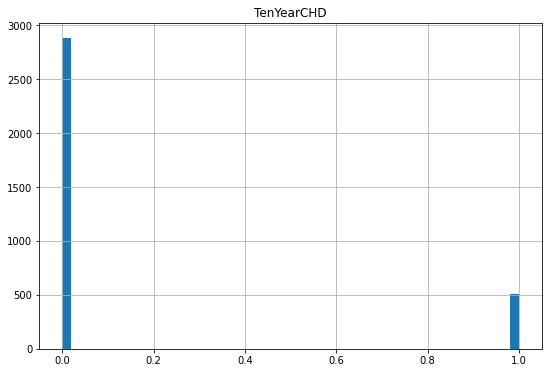

In [14]:
# plot a bar plot for each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)    
    ax.set_title(col)
plt.show()

### Inferences:
* People in our dataset are devided into four levels in education point of view and the level 1 people are large as levels increse to four the number is decreased.
* Females are more compared number of males in our dataset.
* number of smokers and non-smokers are equal.
* only few people on blood pressure medication in our dataset.
* only few people had previously had a stroke.
* patients were hypertensive more in number compered to patients were not hypertensive.
* only few people had diabates.
* In our dataset, less percentage of people were prone to cardiac arrest in coming ten years.
* we have imbalanced dataset.

In [15]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


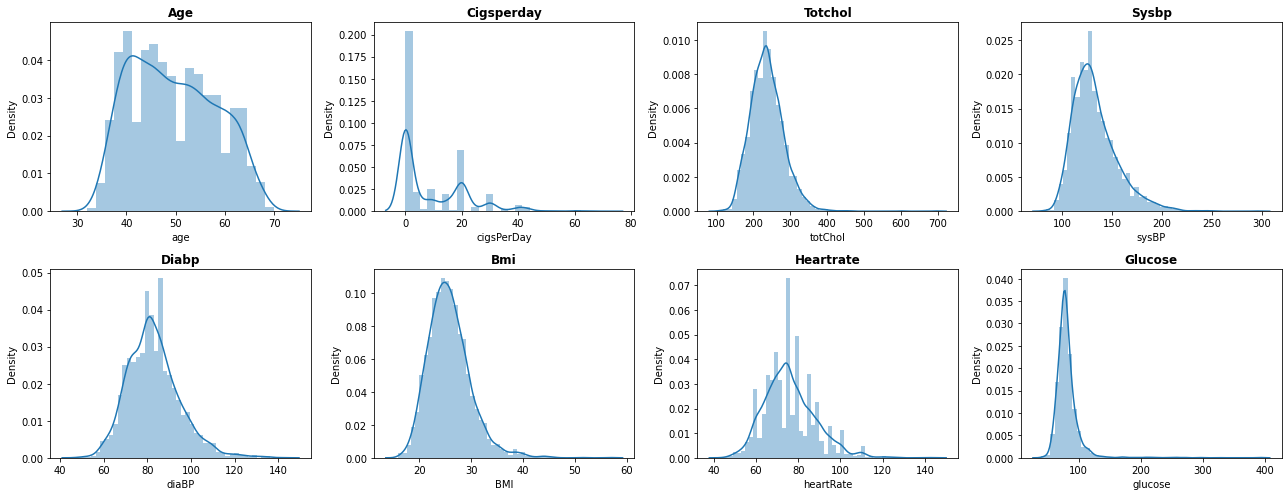

In [17]:
# Visualizing the distributions.
plt.figure(figsize=(18,7))
for n,column in enumerate(numeric_features):
  plt.subplot(2, 4, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

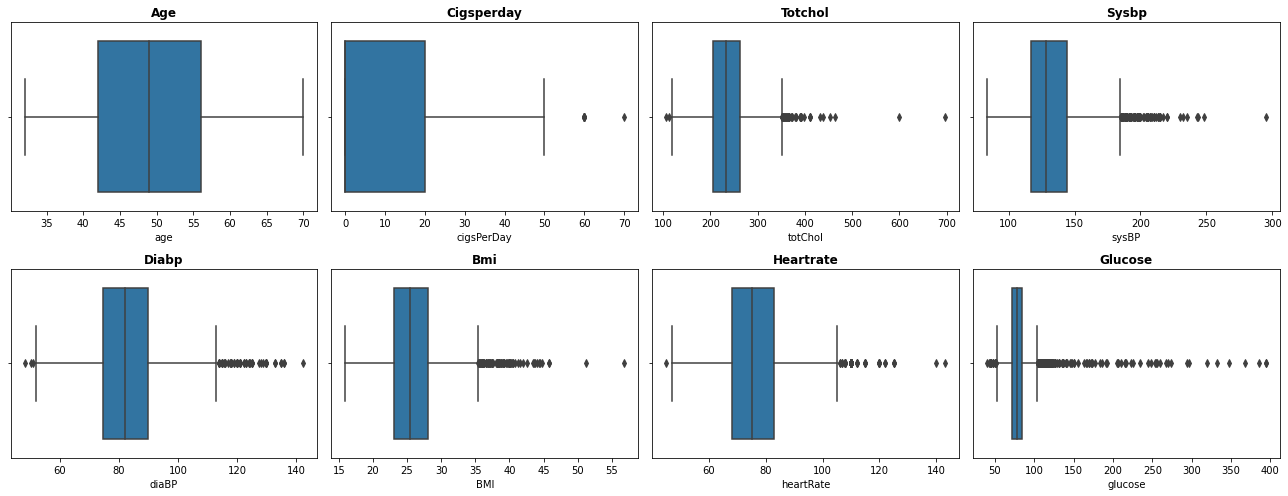

In [21]:
# using box plot to see outliers in each numerical feature in our data
# Visualizing the distributions.
plt.figure(figsize=(18,7))
for n,column in enumerate(numeric_features):
  plt.subplot(2, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

### inferences:
* Age is ranging from 30 to 70.
* cigsperday is ranging from 0 to 70.
* total cholestral is ranging from 100 to 700.
* sysbp is ranging from 100 to 300.
* diabp is ranging from 40 to 140.
* BMI is ranging from 15 to 55.
* heart rate is ranging from 40 to 140.
* glucose level is from 40 to 400.

* we can see outliers in our dataset
* outliers in total cholestral, systolic blood pressure, diastolic blood pressure, body mass index, heartrate and glucose level.

# Outliers Removal:

---
* We should not remove outliers blindly because domain point of view those data points are meaningful to the analysis.
* If we remove all outliers without considering their importance, we may lost impoertant pieces of our study.

### List of Machine Learning algorithms which are sensitive to outliers:
* Linear Regression
* Logistic Regression
* Support Vector Machine
* K- Nearest Neighbors
* K-Means Clustering
* Hierarchical Clustering
* Principal Component Analysis

### List of Machine Learning algorithms which are not sensitive to outliers:
* Decision Tree
* Random Forest
* XGBoost
* AdaBoost
* Naive Bayes

### First, we will check performance of our models without removing ouliers. Then we will decide what to do.

In [24]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(df[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 



In [25]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)


In [26]:
# Checking Whether all features are numeric or not
len(df.columns) == len(df.describe().columns)

True

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


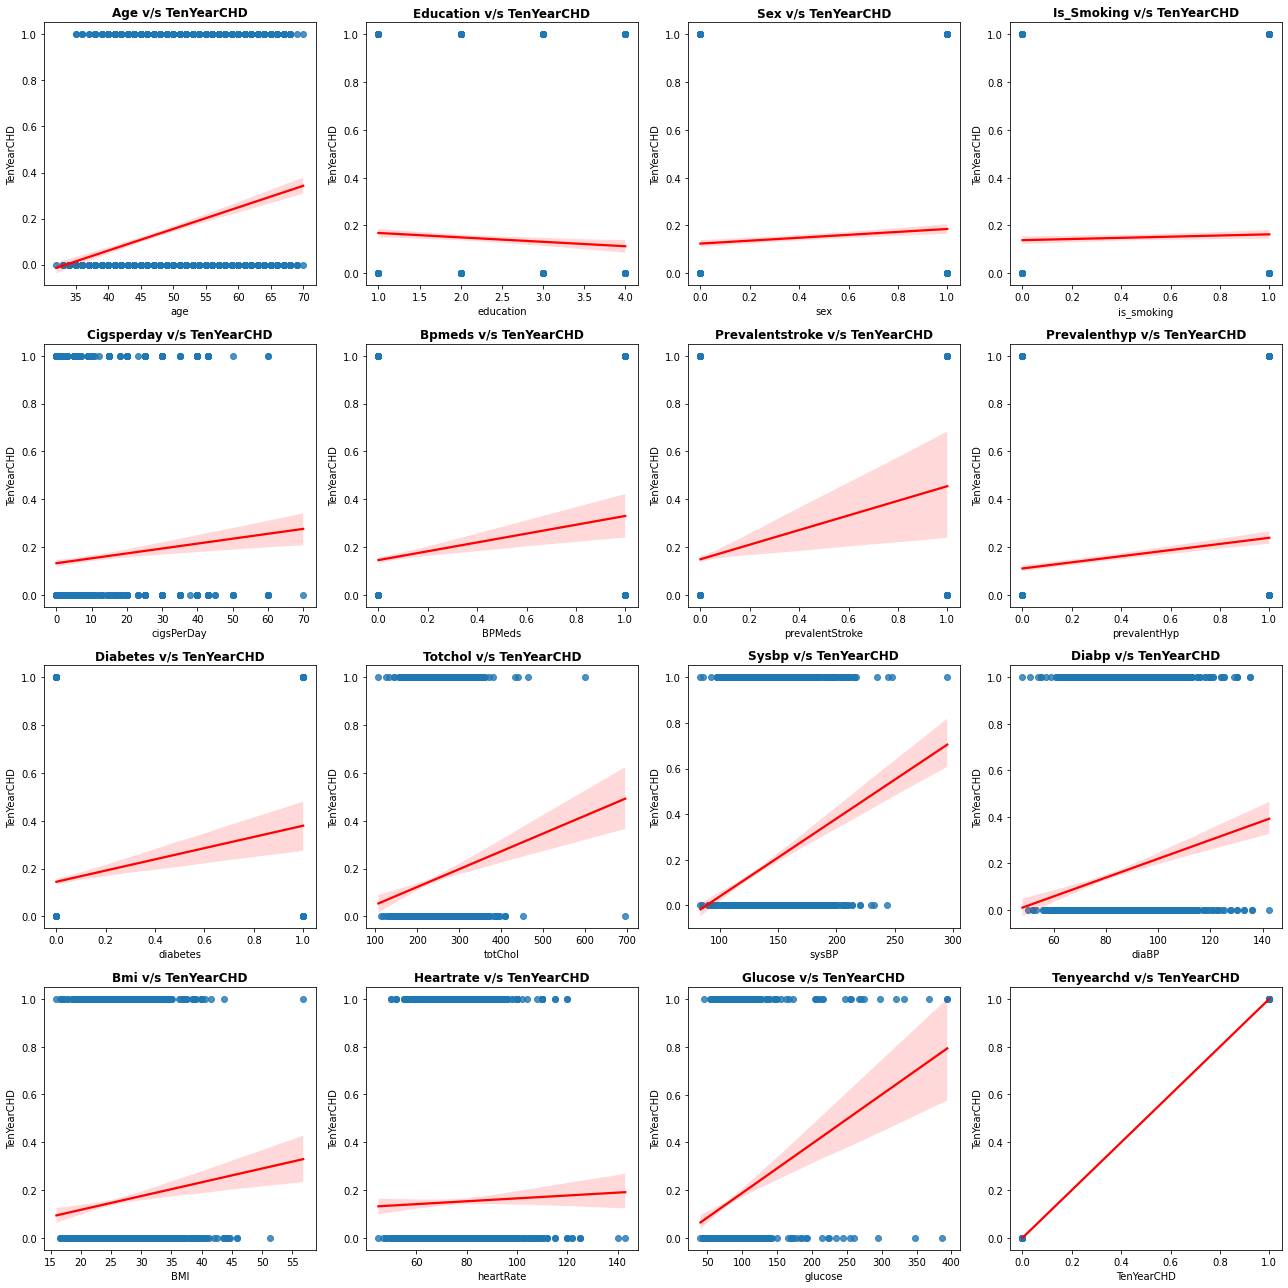

In [28]:
# Checking relationship
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(18,18))
for n,column in enumerate(df.columns ):
  plt.subplot(4, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

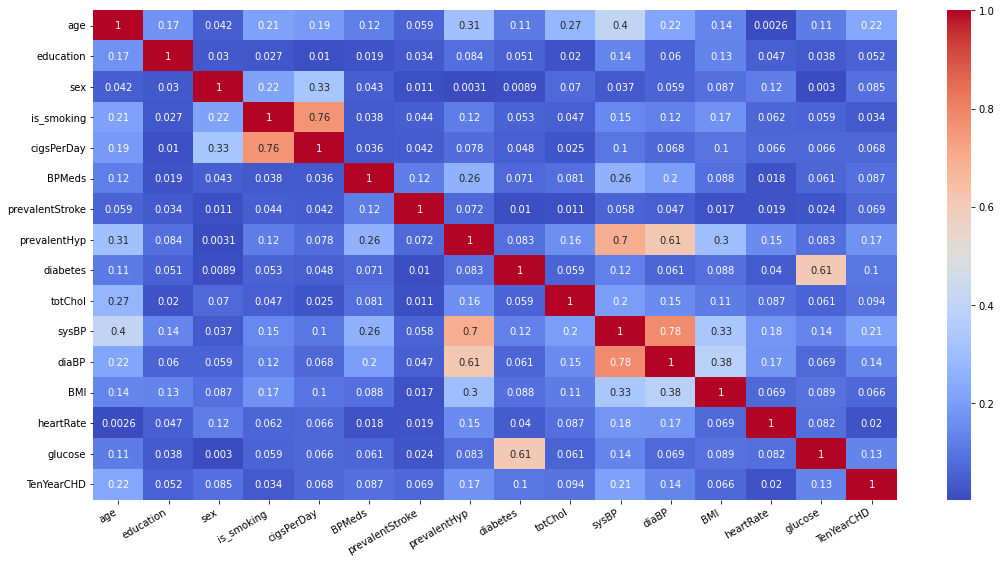

In [29]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()